# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,1,1,1,1,1,1,3,3,3
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,56,68,79,97,128,158,266,301,387,387
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,52,78,84,115,136,160,194,235,249,265
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,2,2,3,4,6,9,19,32,39,39
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,171,210,267,307,353,436,669,669,818,1029


## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,Population,region
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,"35,530,000",Afghanistan_nan
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,NaN,Albania_nan
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,"41,320,000",Algeria_nan
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,NaN,Andorra_nan
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,NaN,Angola_nan
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,1,1,1,1,3,3,3,NaN,Antigua and Barbuda_nan
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,79,97,128,158,266,301,387,387,NaN,Argentina_nan
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,84,115,136,160,194,235,249,265,NaN,Armenia_nan
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,3,4,6,9,19,32,39,39,NaN,Australia_Australian Capital Territory
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,267,307,353,436,669,669,818,1029,"7,544,000",Australia_New South Wales


In [5]:
# merge region death
death.iloc[175:185,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,Population,region
175,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,6,7,7,7,7,10,12,14,"5,357,000",Norway_nan
176,NaN,Oman,21.0000,57.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"4,636,000",Oman_nan
177,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,0,2,3,3,5,6,7,8,"197,000,000",Pakistan_nan
178,NaN,Panama,8.5380,-80.7821,0,0,0,0,0,0,...,1,1,1,1,3,6,6,8,NaN,Panama_nan
179,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Papua New Guinea_nan
180,NaN,Paraguay,-23.4425,-58.4438,0,0,0,0,0,0,...,0,0,0,1,1,1,2,3,NaN,Paraguay_nan
181,NaN,Peru,-9.1900,-75.0152,0,0,0,0,0,0,...,0,0,3,5,5,5,7,9,NaN,Peru_nan
182,NaN,Philippines,13.0000,122.0000,0,0,0,0,0,0,...,19,17,18,19,25,33,35,38,"104,900,000",Philippines_nan
183,NaN,Poland,51.9194,19.1451,0,0,0,0,0,0,...,5,5,5,5,7,8,10,14,"37,980,000",Poland_nan
184,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,2,3,6,12,14,23,33,43,"10,290,000",Portugal_nan


In [6]:
# merge region recover
recover.iloc[175:185,:]

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,Population,region
175,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,2,2,13,13,13,5,5,18,"197,000,000",Pakistan_nan
176,NaN,Panama,8.5380,-80.7821,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,Panama_nan
177,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Papua New Guinea_nan
178,NaN,Paraguay,-23.4425,-58.4438,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Paraguay_nan
179,NaN,Peru,-9.1900,-75.0152,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,NaN,Peru_nan
180,NaN,Philippines,13.0000,122.0000,0,0,0,0,0,0,...,5,5,8,8,13,17,17,20,"104,900,000",Philippines_nan
181,NaN,Poland,51.9194,19.1451,0,0,0,0,0,0,...,13,13,1,1,1,1,1,1,"37,980,000",Poland_nan
182,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,3,3,3,5,5,5,5,22,"10,290,000",Portugal_nan
183,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,4,4,4,10,27,33,33,41,NaN,Qatar_nan
184,NaN,Romania,45.9432,24.9668,0,0,0,0,0,0,...,16,19,25,25,52,64,64,79,"19,530,000",Romania_nan


In [7]:
recover.iloc[215:230,:]

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,Population,region
215,NaN,Ukraine,48.3794,31.1656,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,NaN,Ukraine_nan
216,NaN,United Arab Emirates,24.0000,54.0000,0,0,0,0,0,0,...,23,26,31,31,38,38,38,45,"9,400,000",United Arab Emirates_nan
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,United Kingdom_Bermuda
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,United Kingdom_Cayman Islands
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,United Kingdom_Channel Islands
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,1,2,2,2,2,2,2,5,NaN,United Kingdom_Gibraltar
221,Guernsey,United Kingdom,49.4500,-2.5800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,United Kingdom_Guernsey
222,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,United Kingdom_Isle of Man
223,Jersey,United Kingdom,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,United Kingdom_Jersey
224,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,United Kingdom_Montserrat


## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:

## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute

ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major 2nd Areas')

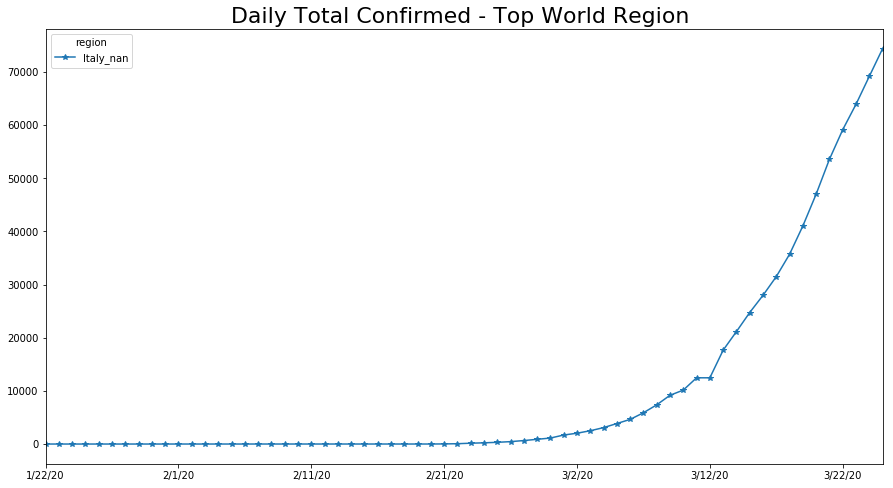

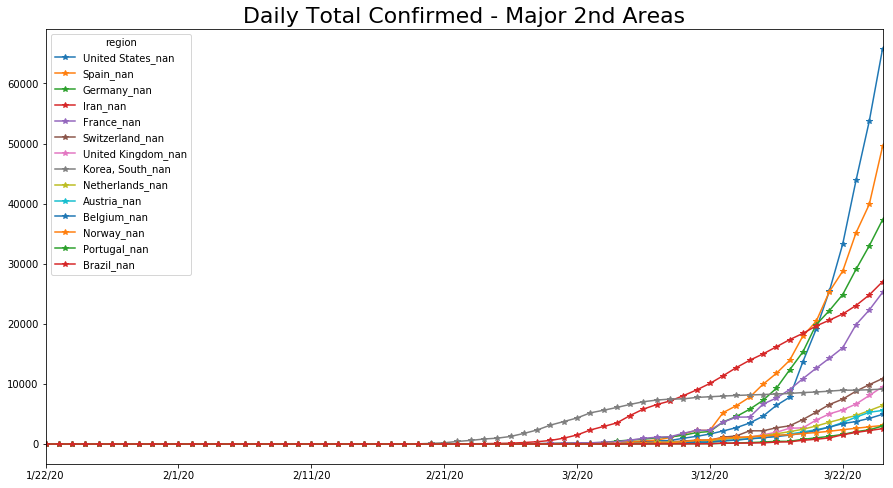

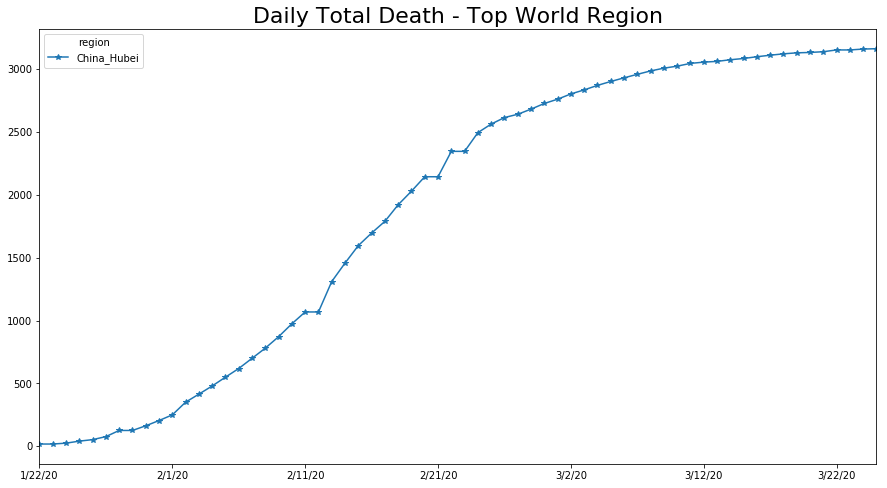

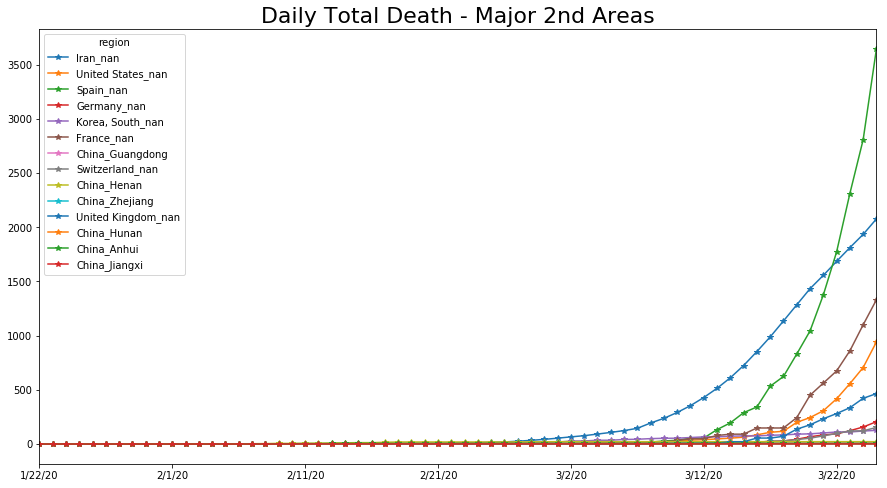

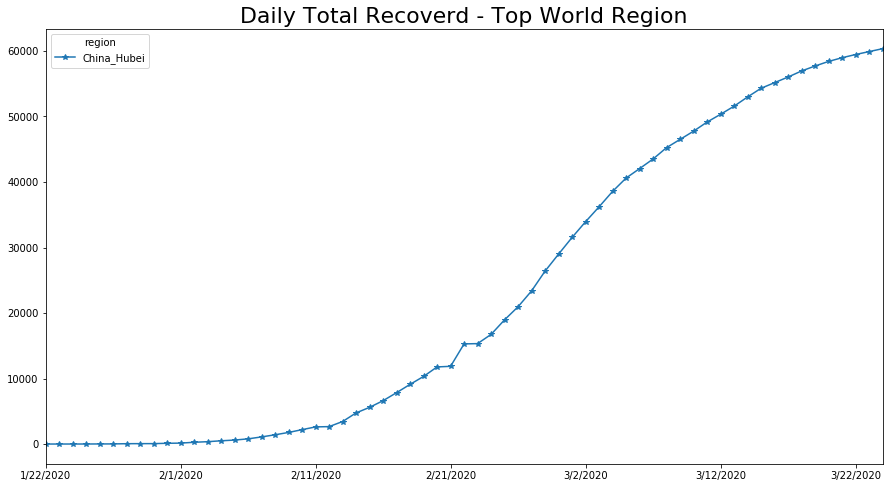

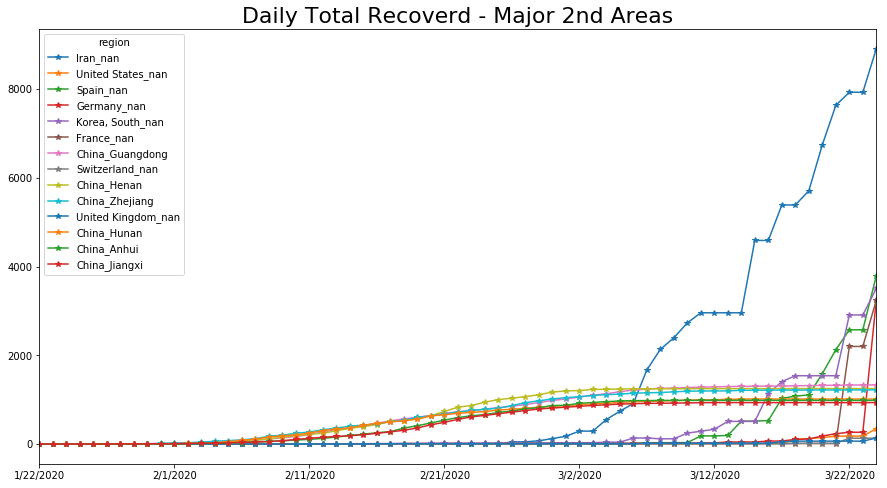

In [17]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(15,8)).set_title('Daily Total Confirmed - Top World Region ',fontdict={'fontsize': 22})
p.iloc[:,2:16].plot(marker='*',figsize=(15,8)).set_title('Daily Total Confirmed - Major 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(15,8)).set_title('Daily Total Death - Top World Region',fontdict={'fontsize': 22})
p_d.iloc[:,2:16].plot(marker='*',figsize=(15,8)).set_title('Daily Total Death - Major 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(15,8)).set_title('Daily Total Recoverd - Top World Region',fontdict={'fontsize': 22})
p_r.iloc[:,2:16].plot(marker='*',figsize=(15,8)).set_title('Daily Total Recoverd - Major 2nd Areas',fontdict={'fontsize': 22})

## Kalman Filter With R

In [18]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv(r'/home/notebookuser/notebooks/covid19/korean/ts_r.csv')

In [11]:
#!pip install rpy2


In [19]:
import rpy2
%load_ext rpy2.ipython

In [20]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [21]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
Sys.setenv(TZ='GMT')
all<- read_csv("/home/notebookuser/notebooks/covid19/ts_2_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

## Pre Proccessing Data for ML Model

### Extract Weather Data

In [35]:
#!pip install pyweatherbit


In [36]:

#from weatherbit.api import Api
#import json  
#import pandas as pd  
#from pandas.io.json import json_normalize 

#api_key = "26141d374d8e49d0a2e1f1254428ce8e"
#api_key ="f206579c74644c4b96a2423cb56a1687"
# #api_key ="81a581ac823849f38427fb5081cb8df8"
# #api_key ="be7aaf4ff7184347aa1ebc2a2db514fe"

#api = Api(api_key)
#api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.
#api.get_forecast(lat='Lat', lon='Lon')

###Weather History

In [37]:

# ################## already done since API is limited to 500 call per day

# w=pd.DataFrame(columns=['date','region','min','max'])
# for i in range (61,len(confirmed)):
#   start_date=pd.to_datetime('2020-01-22')
#   for j in range (4,confirmed.shape[1]-2):
#     jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
#     # j=json_normalize(j)
#     # j=j['data']
#     # max_temp=json_normalize(j['data'])['max_temp'].values[0] # max
#     # min_temp=json_normalize(j['data'])['min_temp'].values[0]
#     try:
#       w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
#     except Exception:
#       w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
#     start_date=start_date+ pd.DateOffset(days=1)

In [38]:

# ################## Update Recent Day Weather

# w_update=pd.DataFrame(columns=['date','region','min','max'])
# for i in range (28,len(confirmed)):
#   start_date=pd.to_datetime('2020-02-17')
#   for j in range (confirmed.shape[1]-4,confirmed.shape[1]-2):
#     jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
#     try:
#       w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
#     except Exception:
#       w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
#     start_date=start_date+ pd.DateOffset(days=1)

In [39]:

# w_update.to_csv(r'w_update.csv')

### Extract Weather Forecast Data

In [40]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

In [31]:
w=pd.read_csv('/home/notebookuser/notebooks/covid19/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Build Train Set Data Structure

In [32]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
### Joao - Fix NaN Kalman_Filter
#t['kalman_prediction']=round(t['kalman_prediction'])
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])
#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
  if(np.isnan(train.iloc[i,13])):
    if(train.iloc[i,1] is train.iloc[i-1,1]):
      train.iloc[i,13]=train.iloc[i-1,13]
      train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in long_scalars
  


## Kalman 1 day Prediction with Evaluation

         region           mse          rmse           mae
65  China_Hubei  2.910249e+09  53946.728046  47344.421875


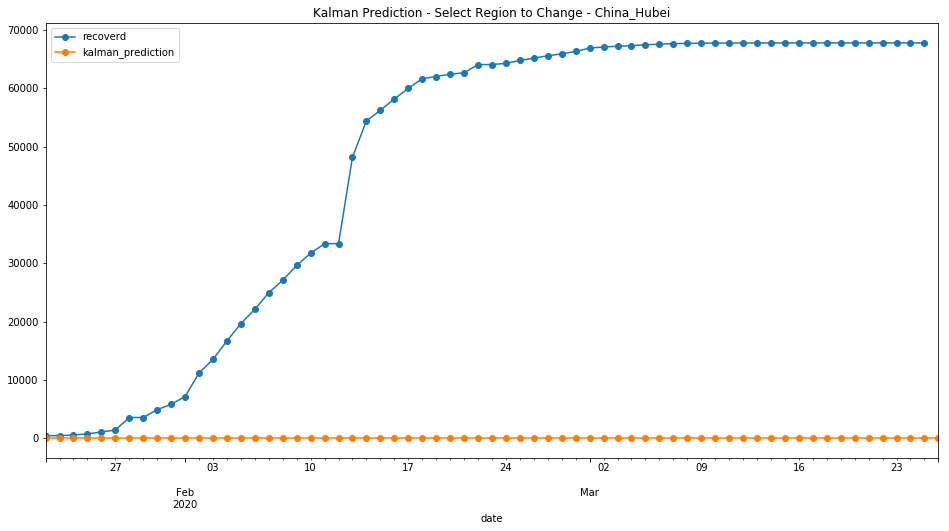

In [39]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Hubei'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

            region          mse        rmse    mae
77  China_Shanghai  93258.90625  305.383212  285.0


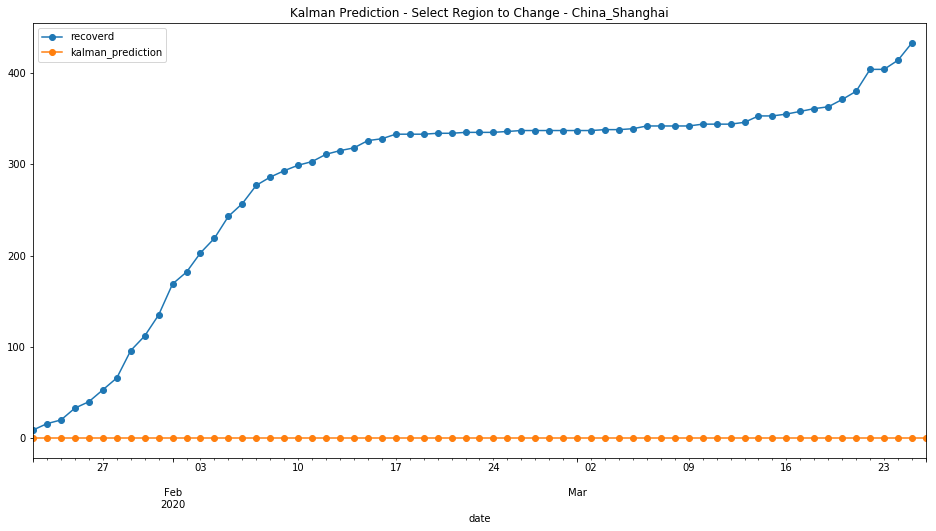

In [38]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Shanghai'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
143  Italy_nan  4.646820e+08  21556.483716  10098.59375


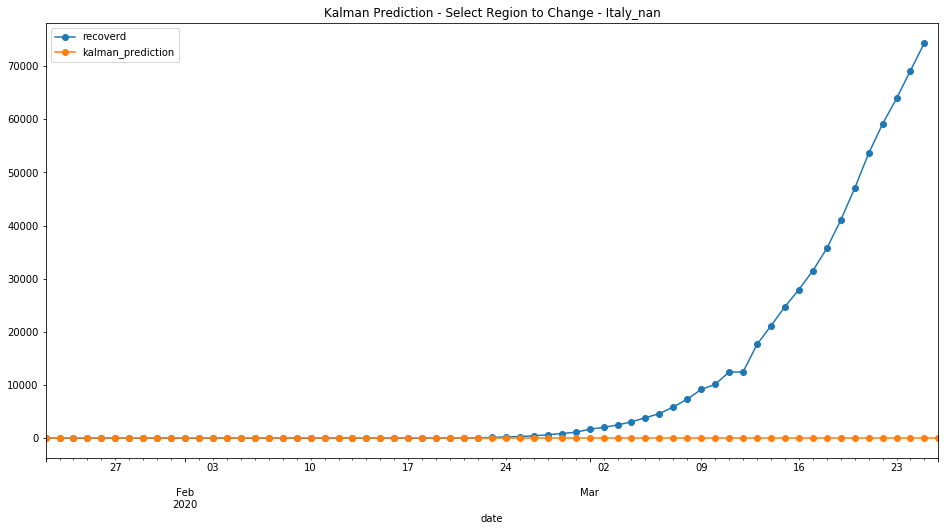

In [37]:
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [40]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='8G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_7uz0zg8
  JVM stdout: /tmp/tmp_7uz0zg8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_7uz0zg8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/GMT
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,"1 year, 4 months and 28 days !!!"
H2O cluster name:,H2O_from_python_unknownUser_3ylrsv
H2O cluster total nodes:,1
H2O cluster free memory:,8 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [41]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training in Italy progression - When growth happened 2020/02/25 to 2020/03/18

train_df=train[train['date']<'2020-03-18']
boots=train_df[train_df['date']>='2020-03-22'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-02-25']]*1000,ignore_index=True)

train_df_italy=train_df[train_df['region']=='Italy_nan']
test=train[train['date']>='2020-03-21']
test=test[test['date']<'2020-03-31']

In [42]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
          #  '1_day_change_rate', 
          #  '3_day_change_rate',
          #  '7_day_change_rate', 
            'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
          ]

In [43]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values
pred2.iloc[:55]

,0,confirmed,date,region
0,43.0,24,2020-03-21,Afghanistan_nan
1,42.0,40,2020-03-22,Afghanistan_nan
2,63.0,40,2020-03-23,Afghanistan_nan
3,59.0,74,2020-03-24,Afghanistan_nan
4,105.0,84,2020-03-25,Afghanistan_nan
5,111.0,0,2020-03-26,Afghanistan_nan
6,77.0,76,2020-03-21,Albania_nan
7,83.0,89,2020-03-22,Albania_nan
8,99.0,104,2020-03-23,Albania_nan
9,116.0,123,2020-03-24,Albania_nan


In [44]:
pred2.iloc[100:150]

,0,confirmed,date,region
100,5919.0,5588,2020-03-25,Austria_nan
101,6087.0,0,2020-03-26,Austria_nan
102,49.0,53,2020-03-21,Azerbaijan_nan
103,61.0,65,2020-03-22,Azerbaijan_nan
104,74.0,72,2020-03-23,Azerbaijan_nan
105,81.0,87,2020-03-24,Azerbaijan_nan
106,99.0,93,2020-03-25,Azerbaijan_nan
107,103.0,0,2020-03-26,Azerbaijan_nan
108,5.0,4,2020-03-21,Bahamas_nan
109,6.0,4,2020-03-22,Bahamas_nan


In [45]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_italy_v2 = h2o.H2OFrame(train_df_italy) # different model for Hubei

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_italy_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_italy_v2.train(x=training_columns, y=response_column, training_frame=train_h20_italy_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [46]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao - Italian Model
model_italy_v2.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF

,variable,relative_importance,scaled_importance,percentage
0,7_day_change,3.968766e+11,1.000000,0.289177
1,infected_rate,3.017454e+11,0.760300,0.219861
2,last_day,2.801479e+11,0.705882,0.204125
3,3_day_change,1.841504e+11,0.463999,0.134178
4,1_day_change,1.465987e+11,0.369381,0.106817
5,7_day_change_rate,3.611092e+10,0.090988,0.026312
6,3_day_change_rate,1.850041e+10,0.046615,0.013480
7,1_day_change_rate,7.693185e+09,0.019384,0.005606
8,min,6.038366e+08,0.001521,0.000440
9,max,6.813773e+06,0.000017,0.000005


In [47]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Italy_v2
performance = model_italy_v2.model_performance(test_data=test_h20)
# # Model Create Predictions
pred=model_italy_v2.predict(test_h20);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test['confirmed'].values
pred['date']=test['date'].values
pred['region']=test['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


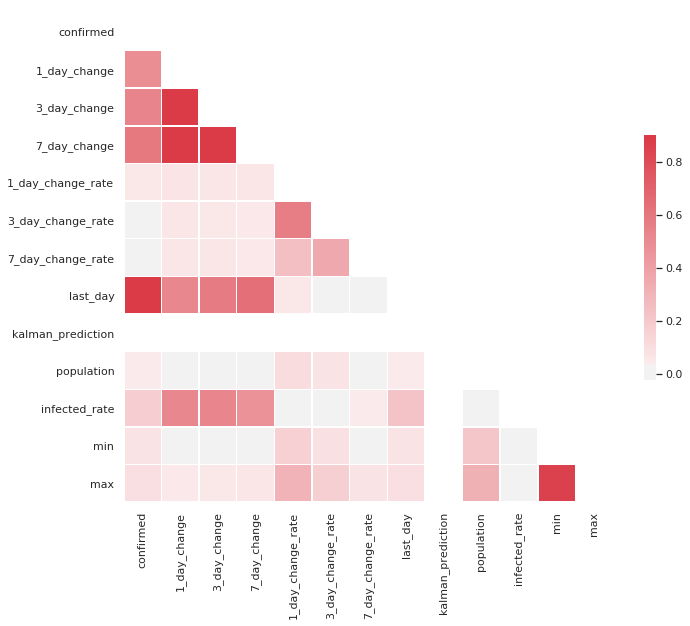

In [48]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [49]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.488918
3_day_change         0.540602
7_day_change         0.596042
1_day_change_rate    0.057259
3_day_change_rate    0.033265
7_day_change_rate    0.022347
last_day             0.956259
kalman_prediction         NaN
population           0.040224
infected_rate        0.182908
min                  0.071173
max                  0.096353
Name: confirmed, dtype: float64


Text(0.5, 1.0, 'Daily Min/Max Temperature - Italy')

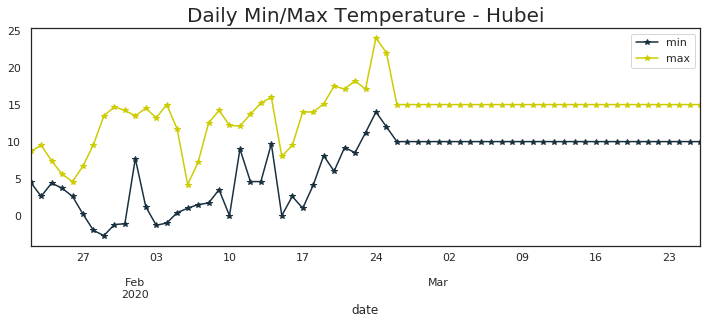

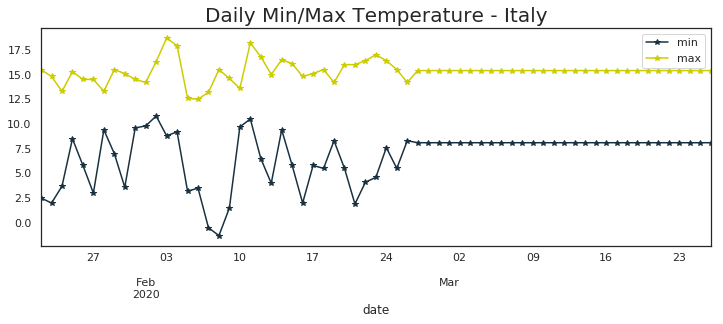

In [50]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')

p=p[p['region']=='China_Hubei']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Hubei',fontdict={'fontsize': 20})

## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='Italy_nan']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Italy',fontdict={'fontsize': 20})
#
#

In [51]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min        max
region                                        
China_Hubei                6.620000  13.787692
Italy_nan                  6.769231  15.318462
Iran_nan                   4.837313  13.955224
United States_nan          0.000000   0.000000
Spain_nan                  5.854545  14.727273
Germany_nan                1.484848   5.090909
Korea, South_nan           0.000000   0.000000
France_nan                 2.569231   9.038462
China_Guangdong           14.803077  24.973846
China_Henan                2.712308  10.055385
China_Zhejiang             8.536923  15.200000
Switzerland_nan           -1.492958   1.577465
United Kingdom_nan         0.000000   0.000000
China_Hunan                9.135385  15.303077
China_Anhui                5.489231  12.075385
China_Jiangxi             10.250769  16.861538
Netherlands_nan            0.000000   0.000000
China_Shandong            -0.398462   9.181538
Austria_nan             

##Kalman X Days Ahead Prediction

In [41]:
%%R

install.packages('reshape')







	‘/tmp/RtmpaF7a5G/downloaded_packages’





In [52]:
%%R

#install.packages('reshape')

NULL


In [53]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/korean/ts_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
for (i in 1:45) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [54]:
all_new=%R all_new

In [55]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Italy_nan')

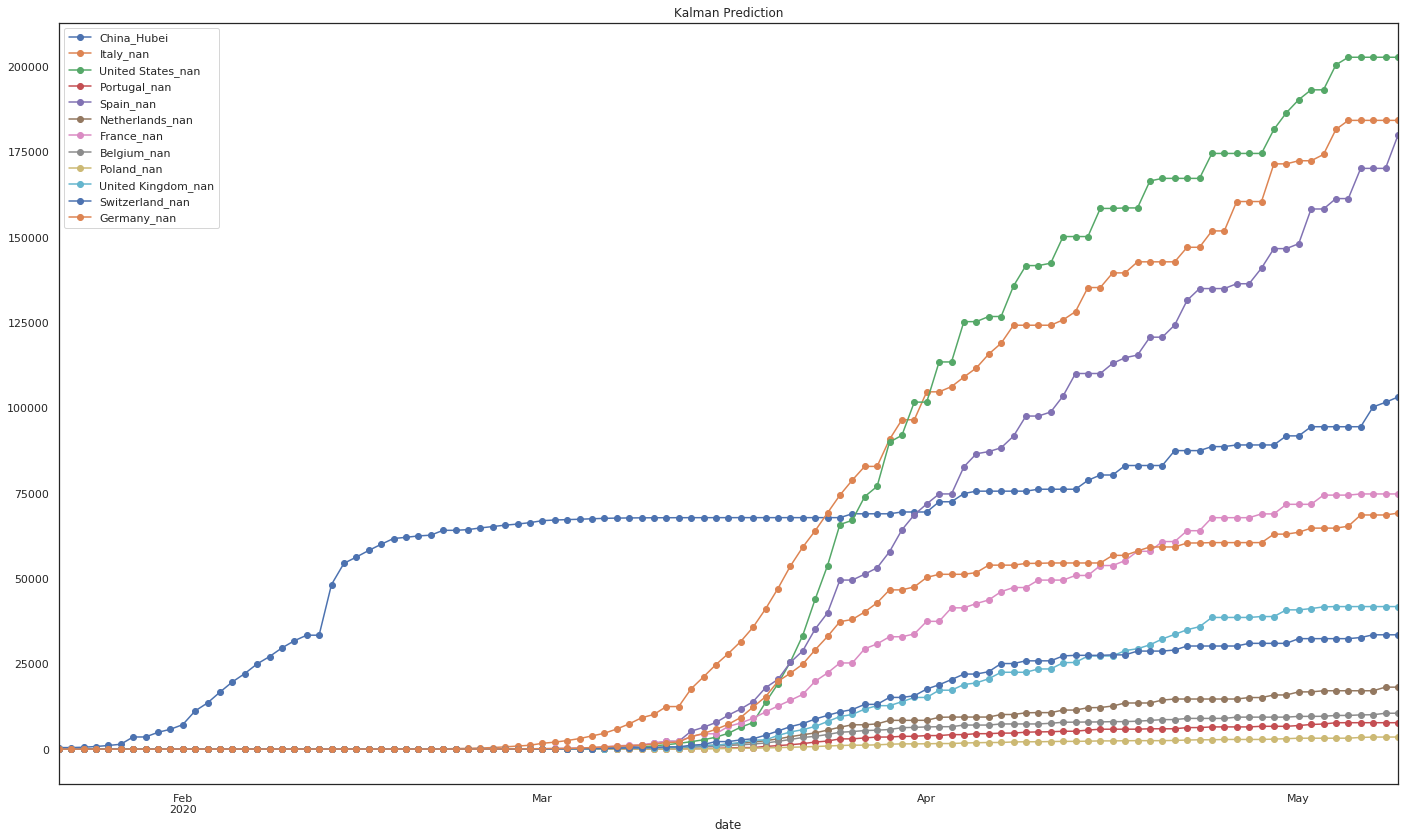

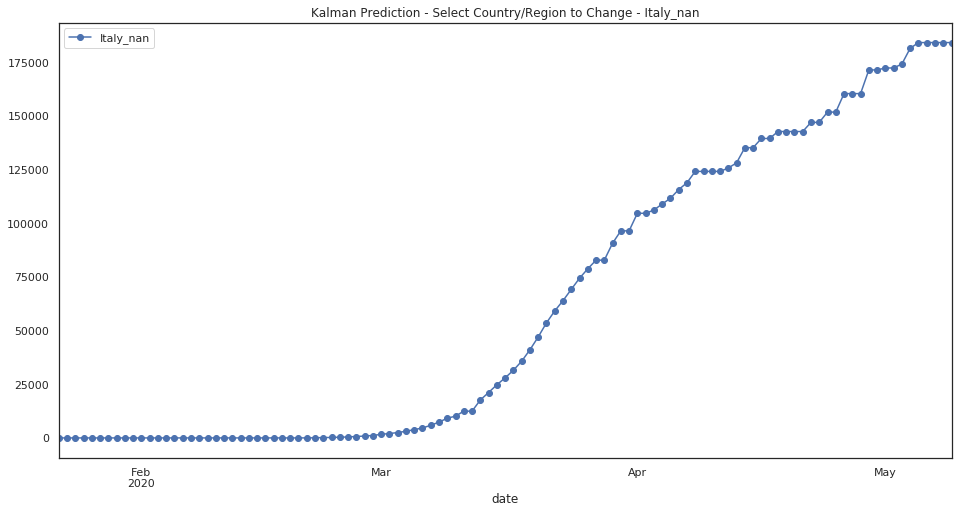

In [56]:
# ['Australia_New South Wales', 'Australia_Queensland',
#        'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
#        'Cambodia_nan', 'Canada_British Columbia', 'Canada_London, ON',
#        'Canada_Toronto, ON', 'China_Anhui', 'China_Beijing',
#        'China_Chongqing', 'China_Fujian', 'China_Gansu',
#        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
#        'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
#        'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
#        'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
#        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
#        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
#        'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
#        'China_Yunnan', 'China_Zhejiang', 'Egypt_nan', 'Finland_nan',
#        'France_nan', 'Germany_nan', 'Hong Kong_Hong Kong', 'India_nan',
#        'Italy_nan', 'Japan_nan', 'Macau_Macau', 'Malaysia_nan',
#        'Nepal_nan', 'Others_Diamond Princess cruise ship',
#        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
#        'South Korea_nan', 'Spain_nan', 'Sri Lanka_nan', 'Sweden_nan',
#        'Taiwan_Taiwan', 'Thailand_nan', 'UK_nan',
#        'United Arab Emirates_nan', 'Unites States_Boston, MA',
#        'Unites States_Chicago, IL', 'Unites States_Los Angeles, CA',
#        'Unites States_Madison, WI', 'Unites States_Orange, CA',
#        'Unites States_San Antonio, TX', 'Unites States_San Benito, CA',
#        'Unites States_San Diego County, CA',
#        'Unites States_Santa Clara, CA', 'Unites States_Seattle, WA',
#        'Unites States_Tempe, AZ', 'Vietnam_nan']
# Select region
region=['date',
 #       'China_Hubei',
 #      'China_Anhui', 'China_Beijing',
 #      'China_Chongqing', 'China_Fujian', 'China_Gansu',
 #      'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
 #      'China_Hainan', 'China_Hebei', 'China_Heilongjiang','China_Henan','China_Hunan', 
 #      'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
 #      'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
 #      'China_Shandong', 'China_Shanghai', 'China_Shanxi',
 #      'China_Sichuan',  'China_Xinjiang',
 #      'China_Yunnan', 'China_Zhejiang', 
 #     'Hong Kong_Hong Kong','Others_Diamond Princess cruise ship'
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',  
        'Netherlands_nan', 'France_nan', 
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 'Switzerland_nan', 'Germany_nan',
  ### JOAO - LIST of Countries - Finish here       
  #      'Japan_nan'
       ]
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')

#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Italy_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))


Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - United Kingdom_nan')

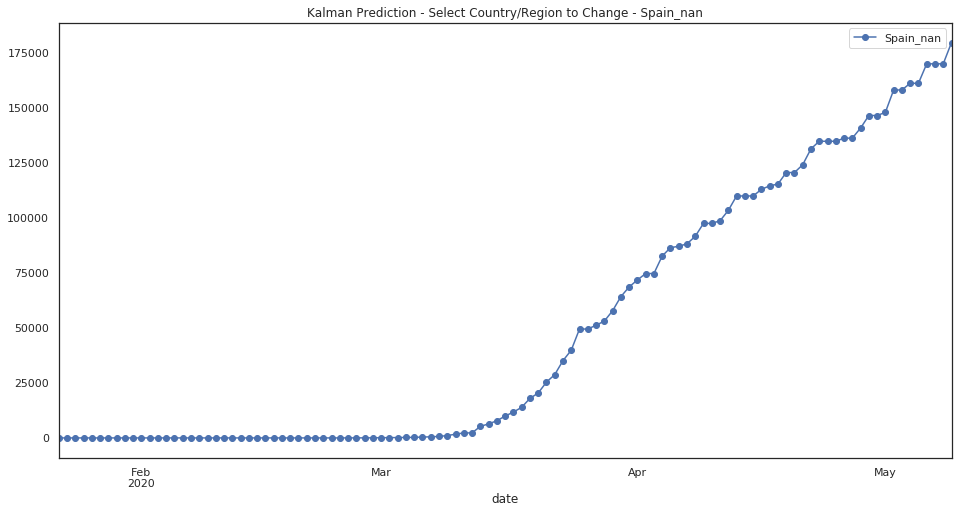

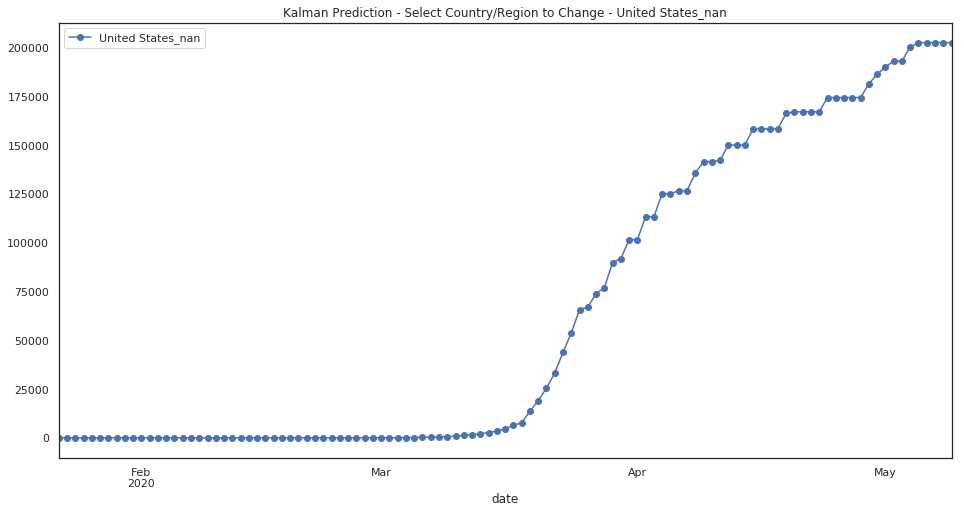

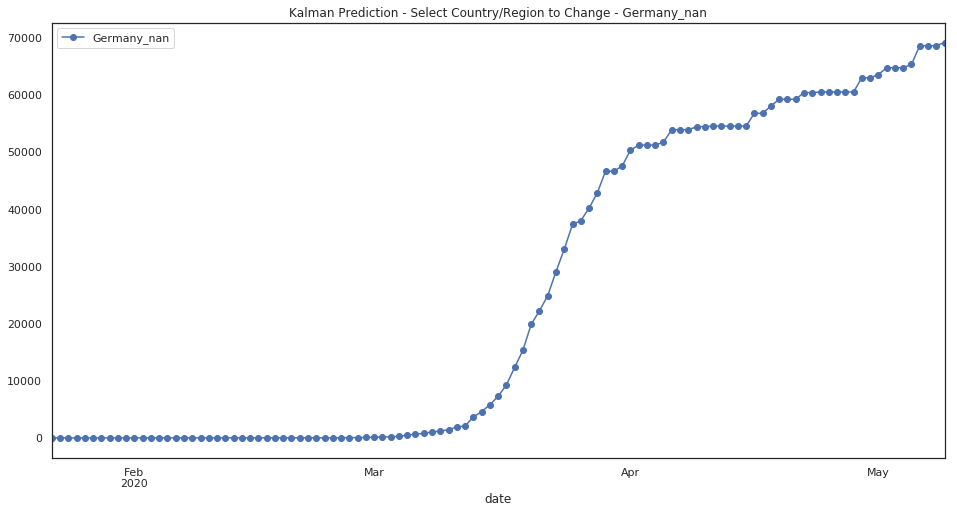

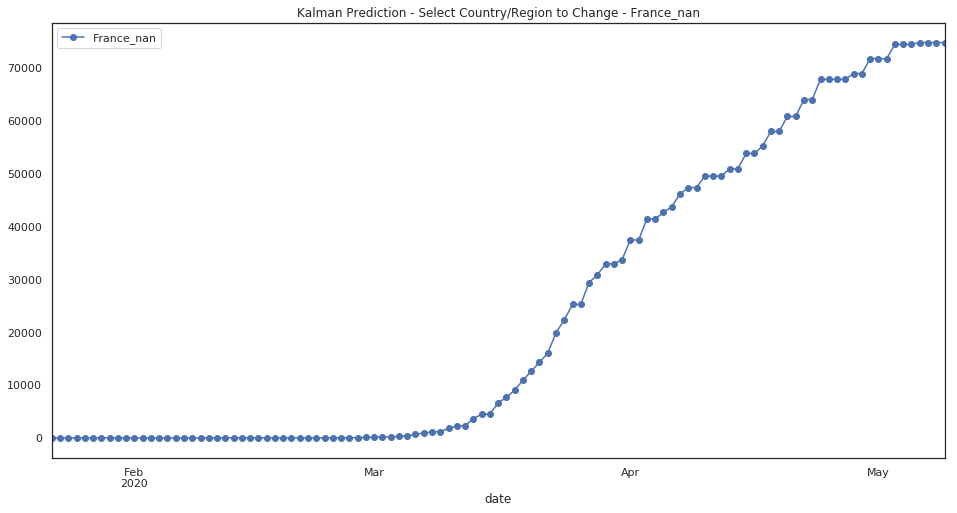

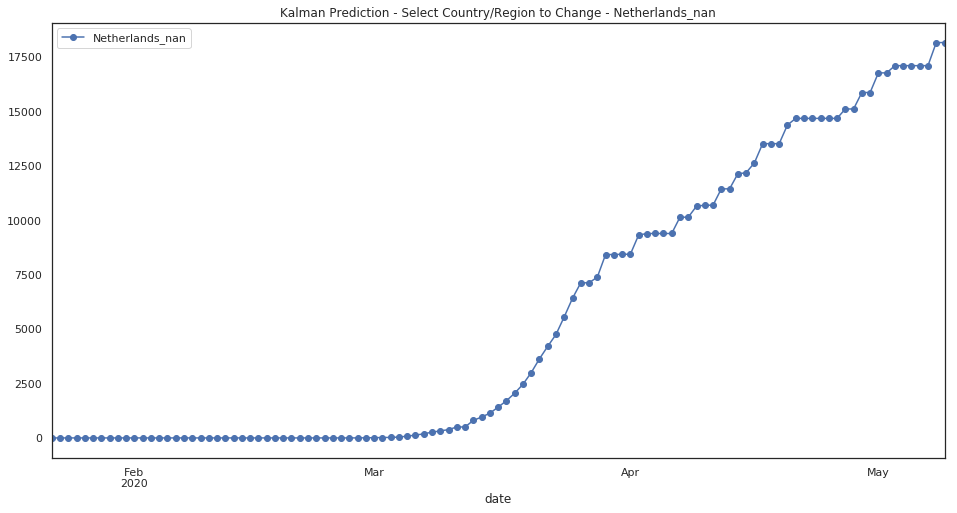

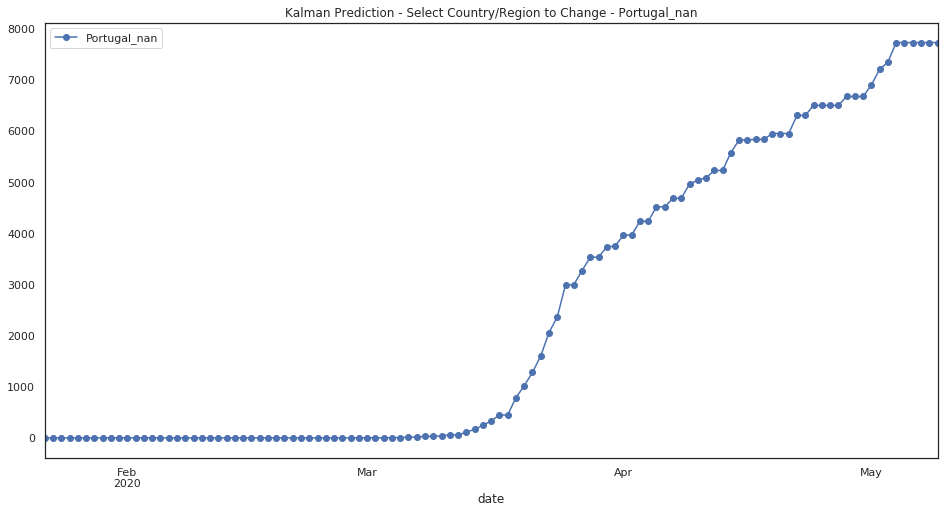

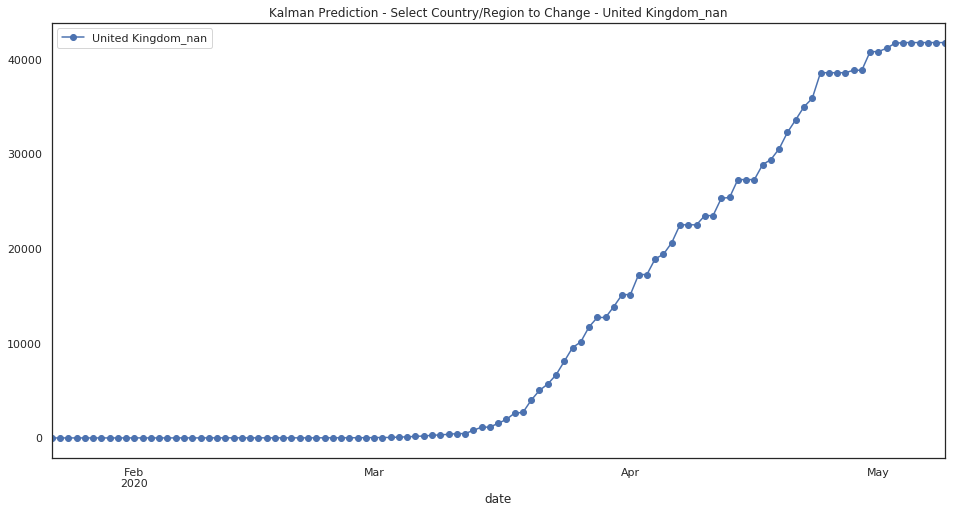

In [57]:
p_kalman3=all_new[['date','Spain_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))

p_kalman4=all_new[['date','United States_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))

p_kalman5=all_new[['date','Germany_nan']] ## Joao
p_kalman5=p_kalman5.set_index(['date'])
p_kalman5.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman5.columns[0]))

p_kalman6=all_new[['date','France_nan']] ## Joao
p_kalman6=p_kalman6.set_index(['date'])
p_kalman6.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman6.columns[0]))

p_kalman7=all_new[['date','Netherlands_nan']] ## Joao
p_kalman7=p_kalman7.set_index(['date'])
p_kalman7.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman7.columns[0]))

p_kalman8=all_new[['date','Portugal_nan']] ## Joao
p_kalman8=p_kalman8.set_index(['date'])
p_kalman8.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman8.columns[0]))

p_kalman9=all_new[['date','United Kingdom_nan']] ## Joao
p_kalman9=p_kalman9.set_index(['date'])
p_kalman9.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman9.columns[0]))



In [0]:
# t.to_csv(r't.csv')

## Iterative Regression

In [58]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
  if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
    t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
  if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
    t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
    t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
    t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
  if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
    t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
    t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
  if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
    t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
    t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
  if(np.isnan(test_iter.iloc[i,13])):
    if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
      test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
      test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [59]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max


In [60]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
      if(pred.iloc[i,0]<pred.iloc[i-1,1]):
        pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

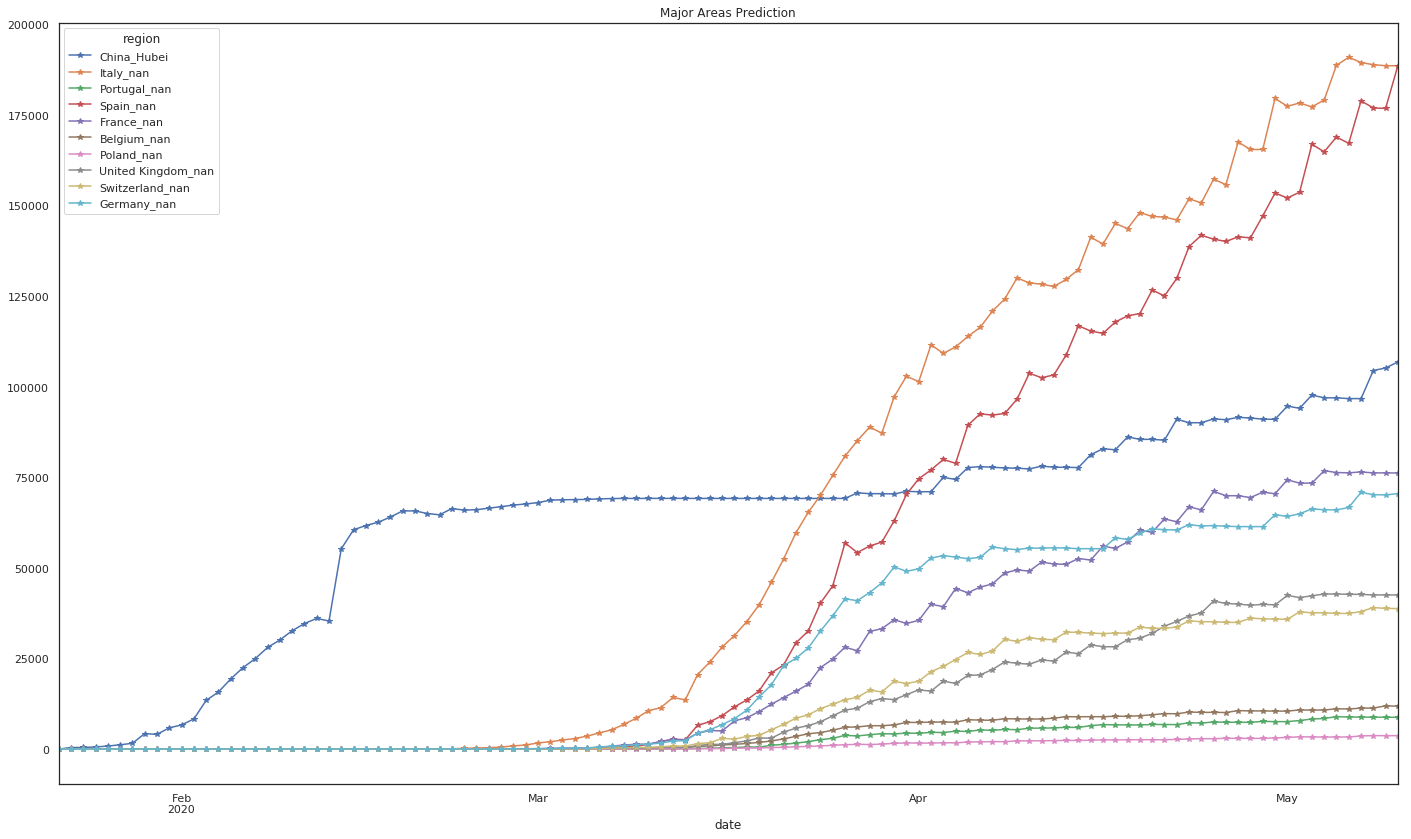

In [63]:
region=[
  #     'China_Anhui', 'China_Beijing',
  #     'China_Chongqing', 'China_Fujian', 'China_Gansu',
  #     'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
  #     'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan','China_Hunan', 
  #     'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
  #     'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
  #     'China_Shandong', 'China_Shanghai', 'China_Shanxi',
  #     'China_Sichuan',  'China_Xinjiang',
  #     'China_Yunnan', 'China_Zhejiang', 
  #      'Hong Kong_Hong Kong','Japan_nan','Others_Diamond Princess cruise ship'
  #  
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
#        'United States_nan',
        'Portugal_nan', 'Spain_nan',  
#        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 'Switzerland_nan', 'Germany_nan',
  ### JOAO - LIST of Countries - Finish here     
       ]

# region=['China_Anhui', 'China_Beijing',
#        'China_Chongqing', 'China_Fujian', 'China_Gansu',
#        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
#        'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
#        'China_Jiangsu', 'China_Jiangxi', 'China_Liaoning',
#        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
#        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      
#        'China_Yunnan', 'China_Zhejiang' 
#      ]

### Joao - ERROR - KeyError: "None of [Index(['Portugal_nan', 'Andorra_nan', 'Spain_nan', 'Belgium_nan',\n       'Morocco_nan', 'Netherlands_Netherlands', 'France_France', 'Poland_nan',\n       'United Kingdom_United Kingdom', 'Switzerland_nan', 'Germany_nan',\n       'Italy_nan'],\n      dtype='object')] are in the [columns]"     

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

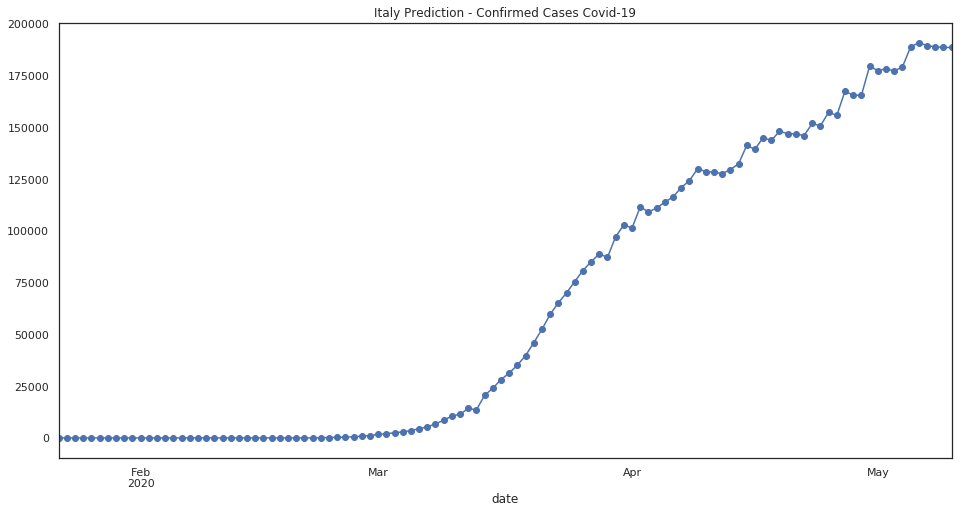

In [64]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2.plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

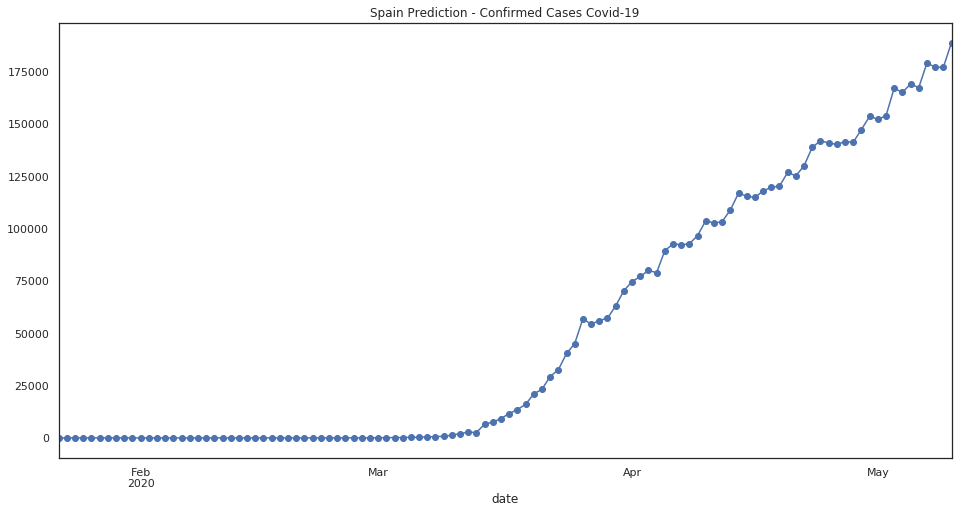

In [65]:
p3=pred['Spain_nan']
p3.plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

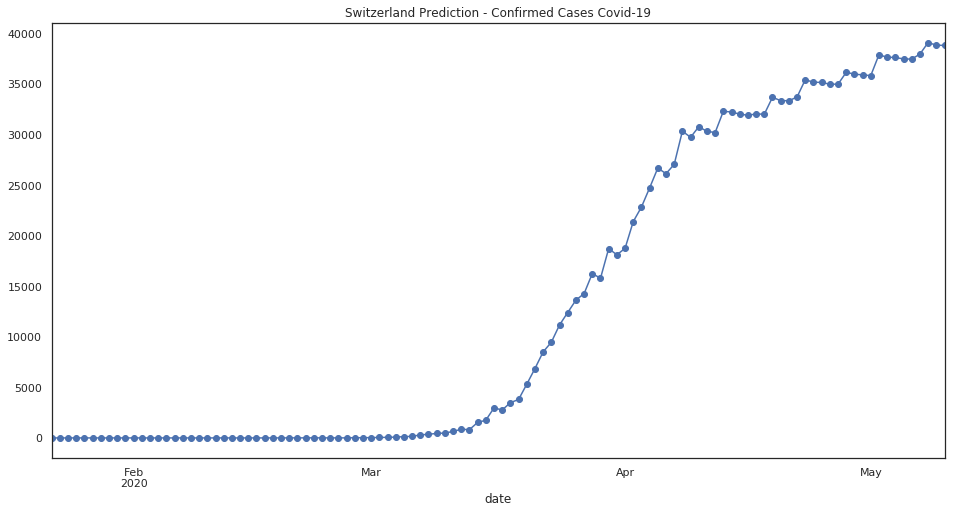

In [66]:
p4=pred['Switzerland_nan']
p4.plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

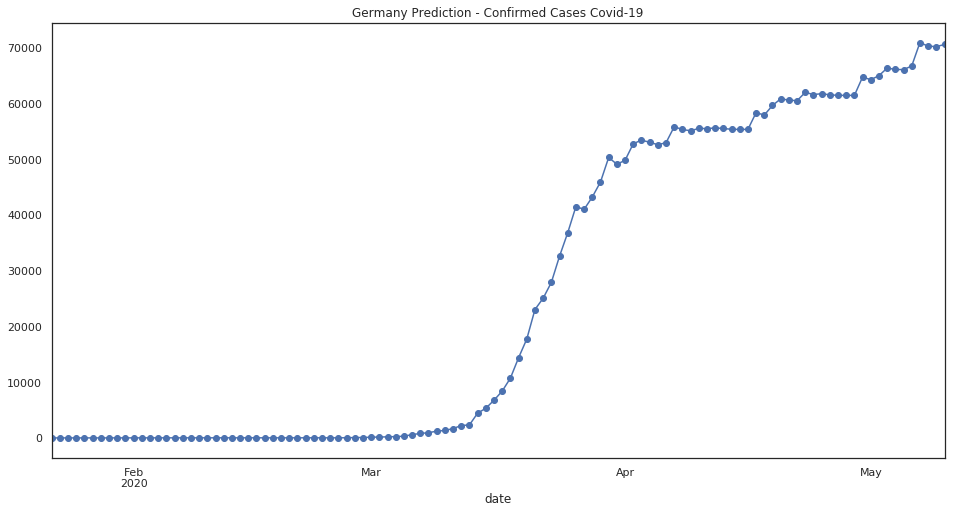

In [67]:
p5=pred['Germany_nan']
p5.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

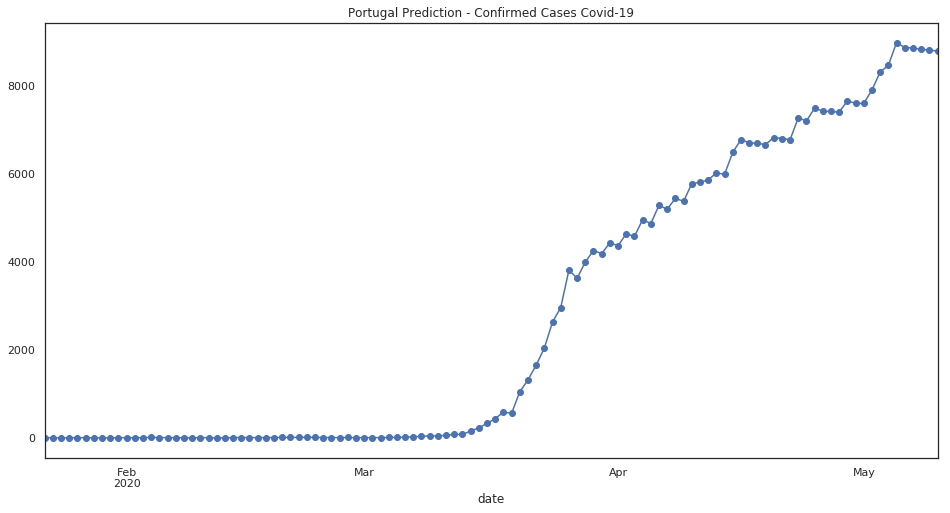

In [68]:
p6=pred['Portugal_nan']
p6.plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

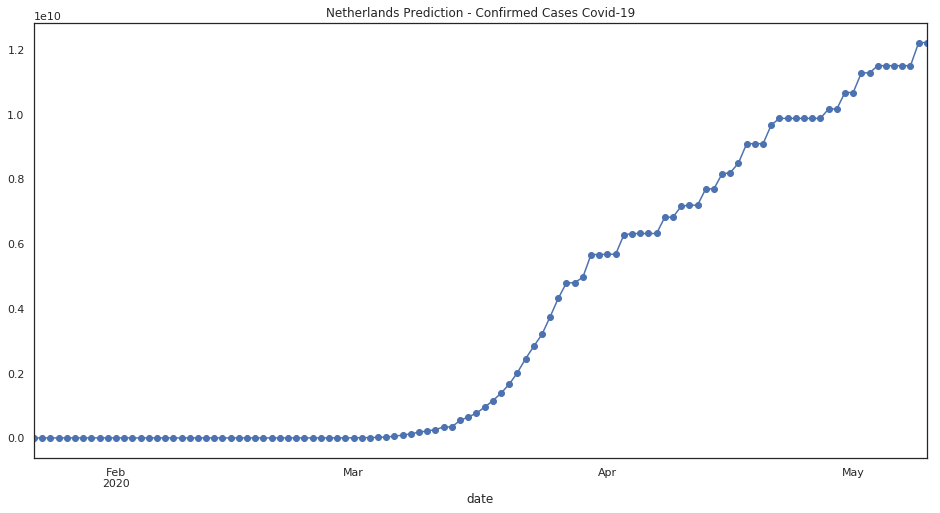

In [69]:
p7=pred['Netherlands_nan']
p7.plot(marker='o',figsize=(16,8),title ='Netherlands Prediction - Confirmed Cases Covid-19')

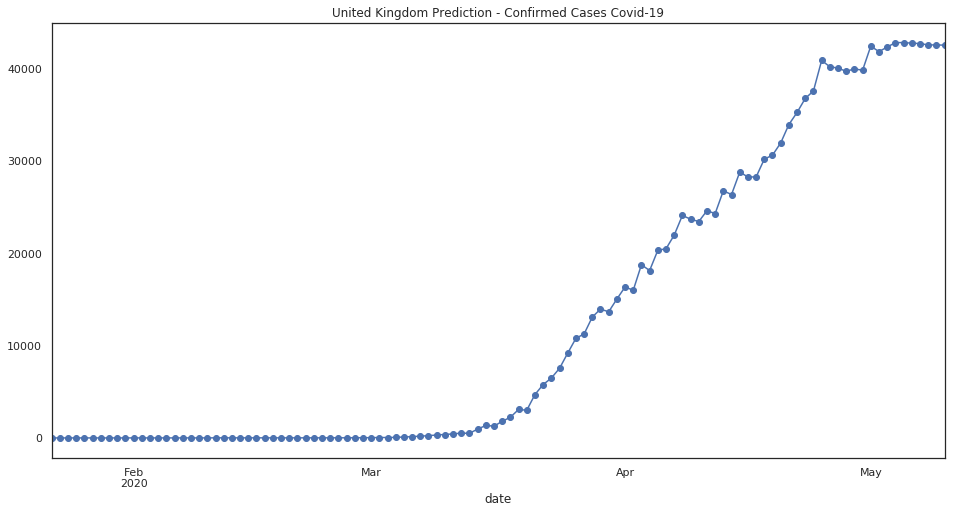

In [70]:
p8=pred['United Kingdom_nan']
p8.plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

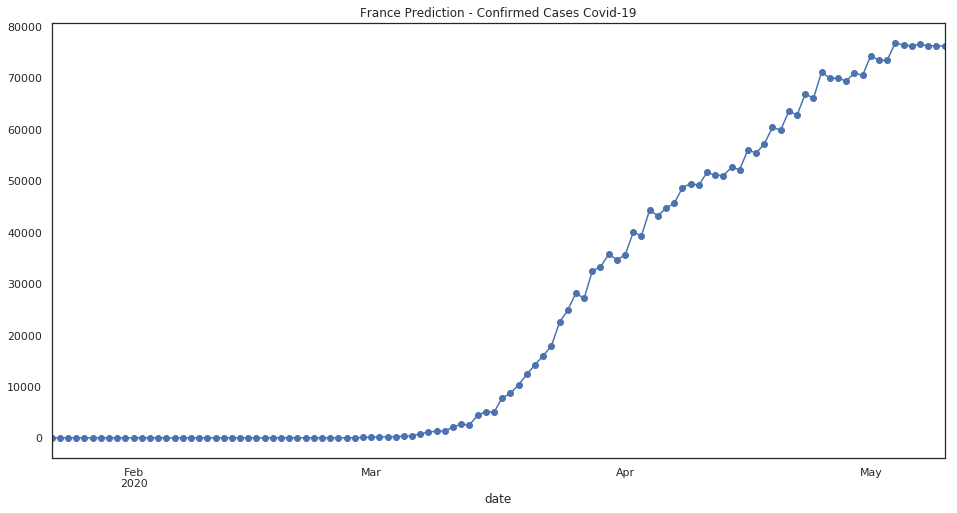

In [71]:
p9=pred['France_nan']
p9.plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

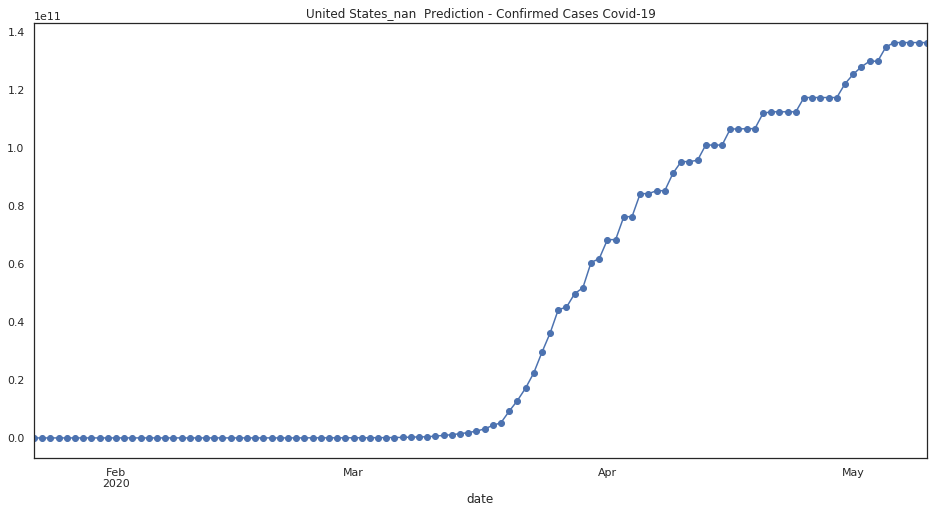

In [72]:
p10=pred['United States_nan']
p10.plot(marker='o',figsize=(16,8),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

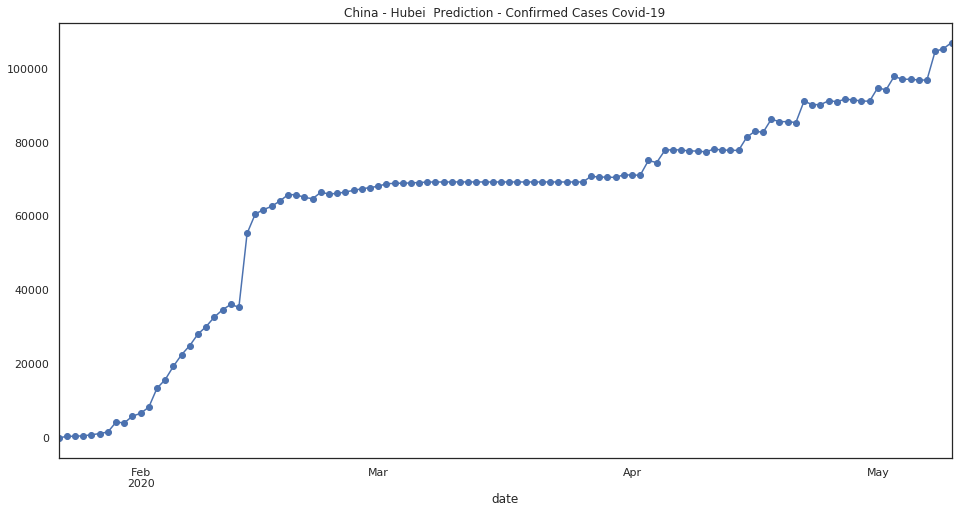

In [73]:
p11=pred['China_Hubei']
p11.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

In [80]:
pv1=p #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [81]:
p[:6]

,0
date,
2020-01-22,14.0
2020-01-23,13.0
2020-01-24,11.0
2020-01-25,9.0
2020-01-26,10.0
2020-01-27,12.0


In [82]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


In [83]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [84]:
heatmap=confirmed[['region','Lat','Long']]
p_m=pred.T
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [85]:
heatmap_m.columns.values[:113] #9/30/61/107

array(['region', 'Lat', 'Long', Timestamp('2020-01-22 00:00:00'),
       Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'),
       Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'),
       Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'),
       Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'),
       Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'),
       Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'),
       Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'),
       Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'),
       Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'),
       Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'),
       Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'),
       Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'),
       Timestamp('2020-02-16 00:00

In [88]:
### JOAO - Error - IndexError: single positional indexer is out-of-bounds
heatmap=pd.DataFrame(p)
vmaxni=113
vmaxnii=60
#for i in range(0,len(heatmap_m)):
#    if heatmap_m.iloc[i,vmaxni].astype(int)==0:  # heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
#        continue
        
heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,vmaxnii].astype(int)), ignore_index=True,sort=False))

In [89]:
latitudes = heatmap['Lat']
longitudes = heatmap['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
# Generate the heatmap into an HTML file
gmap.draw("Heatmap4-2020-02-26.html")

In [90]:
exit()

H2O session _sid_8969 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
